## Paragraph to Line

This module segments Paragraph to Individual Lines.

It takes input from drive and stores the line segments  in 'to predict lines' folder

In [ ]:
!pip install opencv-python-headless==3.4.9.31

Original Image


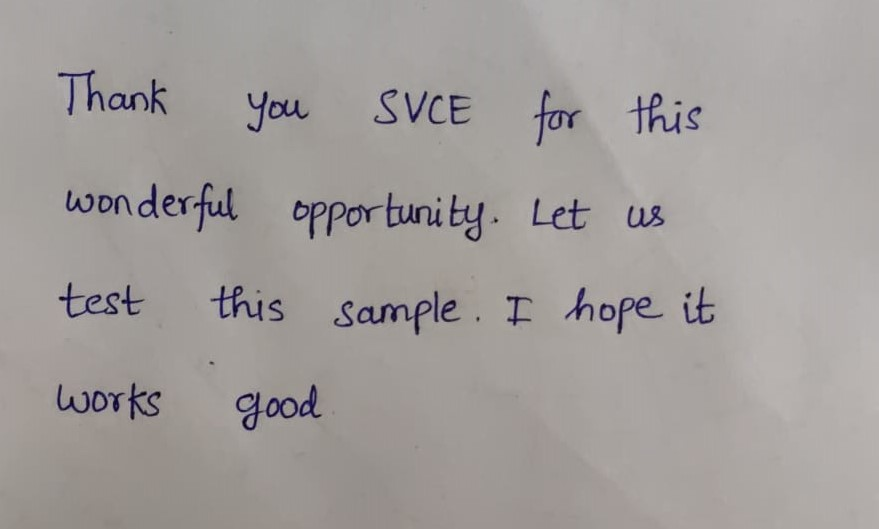

5 



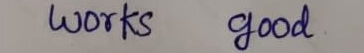

4 



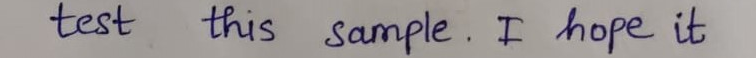

3 



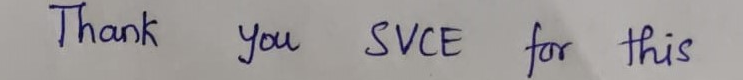

2 



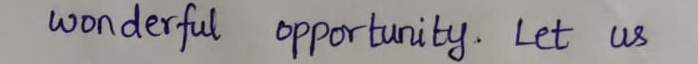

1 



In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
#import image
image = cv2.imread('/content/drive/My Drive/try7.jpeg')
print('Original Image')
cv2_imshow(image)
#cv2.waitKey(0)

#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#plt.imshow(image)
#plt.show()
#cv2.waitKey(0)

#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
#cv2_imshow(thresh)
#cv2.waitKey(0)

#dilation
kernel = np.ones((5,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
#cv2_imshow(img_dilation)
#cv2.waitKey(0)

#find contours
im2,ctrs,hie = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
p=len(sorted_ctrs)
for i, ctr in enumerate(sorted_ctrs):
    
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = image[y:y+h, x:x+w]



    # show ROI
    #cv2_imshow(roi)
    #cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
    cv2.imwrite('/content/drive/My Drive/to predict lines/%d.png'%p, roi)
    print(p,'\n')
    cv2_imshow(roi)
    p-=1

    

    
    #cv2.waitKey(0)

#cv2_imshow(image)
#cv2.waitKey(0)